

## Lab 2

Welcome to the second lab of the AIML!
In addition to implementing code, there will be questions that you must answer which relate to the lab and your implementation. Each question you will answer is preceded by a **'Question X'** header. Carefully read each question and provide you answer or code in the following textboxes with **'Answer:'** header. Your lab submission will be evaluated based on your answers to each of the questions and the implementation you provide.

# Every question is of 1 mark.

## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Probabilty Distributions

5) Linear Regression

## Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

Hint: You can import ttest function from scipy to perform t tests 

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

#### Answer:

In [134]:
import pandas as pd
GPU1 = pd.DataFrame([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = pd.DataFrame([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

[## Question 2 
](https://)
He is trying a third GPU which is GPU3.

In [135]:
GPU3 = pd.DataFrame([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In [136]:
from scipy.stats import ttest_ind
ttest_ind(GPU1[0],GPU2[0])
#As p value is less than 0.05, we will reject the null hypothesis and we will accept the alternate hypothesis
#Which means there is a significant relationship between GPU1 and GPU3

Ttest_indResult(statistic=-2.627629513471839, pvalue=0.013794282041452725)

### ANOVA

## Question 3 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed
But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [137]:
import pandas as pd
e1 = pd.DataFrame([1.595440,1.419730,0.000000,0.000000])
e2 = pd.DataFrame([1.433800,2.079700,0.892139,2.384740])
e3 = pd.DataFrame([0.036930,0.938018,0.995956,1.006970])

Hint - You can use stats.levene function and stats.f_oneway function.

#### Answer:

In [140]:
from scipy.stats import f_oneway
 
F, p = f_oneway(e1[0],e2[0],e3[0])

print(F)
print(p)

#As p value is greater than 0.05, we will accept the null hypothesis, which is all are similar to each other

2.51357622845924
0.13574644501798466


In [139]:
import statistics as stats
print("Std. Dev of e1 is", stats.stdev(e1[0]))
print("Std. Dev of e1 is", stats.stdev(e2[0]))
print("Std. Dev of e1 is", stats.stdev(e3[0]))

from scipy.stats import levene
levene(e1[0],e2[0],e3[0])
#Because the pvalue is greater than 0.05, we can depend upon the ANOVA test.

Std. Dev of e1 is 0.8733555088040227
Std. Dev of e1 is 0.6674627709994392
Std. Dev of e1 is 0.47266095603896313


LeveneResult(statistic=2.6741725711150446, pvalue=0.12259792666001798)

## Question 4 

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

In [141]:
#TypeI: Type I error is the rejection of a true null hypothesis (also known as a "false positive" finding)

In [142]:
#Type II error is failing to reject a false null hypothesis (also known as a "false negative" finding)

# Question 5
You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.

In [143]:
#Null Hypothesis: Would be the waiting time has not changed in the past month and is still 4.5 minutes

In [144]:
#Alternative Hypothesis: Would be the that the waiting time has changed from its mean value of 4.5 minutes

# Question 6 
Get the binomial distribution with n = 10, p = .7 and k = [0, 1, 2, 3, 4, 5, 6, 7]

Hint - Use stats.binom.pmf() function for this.


In [145]:
from scipy.stats import binom

In [146]:
n=10
p = .7
k = [0, 1, 2, 3, 4, 5, 6, 7]
binom.pmf(k,n,p)

array([5.90490000e-06, 1.37781000e-04, 1.44670050e-03, 9.00169200e-03,
       3.67569090e-02, 1.02919345e-01, 2.00120949e-01, 2.66827932e-01])

In [147]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:

col[1]
ds.columns[0]

'sepal width in cm'

'5.1'

In [84]:
ds = pd.read_csv("iris.csv")
ds.columns = ["sepal length in cm","sepal width in cm","petal length in cm","petal width in cm","Iris-setosa"]
from random import sample
ds.sample(10)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,Iris-setosa
72,6.1,2.8,4.7,1.2,Iris-versicolor
68,5.6,2.5,3.9,1.1,Iris-versicolor
81,5.8,2.7,3.9,1.2,Iris-versicolor
114,6.4,3.2,5.3,2.3,Iris-virginica
29,4.8,3.1,1.6,0.2,Iris-setosa
87,5.6,3.0,4.1,1.3,Iris-versicolor
129,7.4,2.8,6.1,1.9,Iris-virginica
97,5.1,2.5,3.0,1.1,Iris-versicolor
86,6.3,2.3,4.4,1.3,Iris-versicolor
148,5.9,3.0,5.1,1.8,Iris-virginica


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [85]:
ds.isnull().sum()

sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
Iris-setosa           0
dtype: int64

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [86]:
ds.dtypes
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
ds.loc[:,["Iris-setosa"]] = label.fit_transform(ds.loc[:,["Iris-setosa"]])
ds.head(10)
ds.dtypes

sepal length in cm    float64
sepal width in cm     float64
petal length in cm    float64
petal width in cm     float64
Iris-setosa            object
dtype: object

C:\Users\JD\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,Iris-setosa
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0
5,4.6,3.4,1.4,0.3,0
6,5.0,3.4,1.5,0.2,0
7,4.4,2.9,1.4,0.2,0
8,4.9,3.1,1.5,0.1,0
9,5.4,3.7,1.5,0.2,0


sepal length in cm    float64
sepal width in cm     float64
petal length in cm    float64
petal width in cm     float64
Iris-setosa             int32
dtype: object

## Question 4

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [90]:
ds_x = ds.iloc[:,0:4]
from statistics import variance
for i in range(0,ds_x.shape[1]):
    print(ds.columns[i])
    variance(ds_x.iloc[:,i])
ds_y = ds.iloc[:,4]
ds_y.head()

sepal length in cm


0.686568111735897

sepal width in cm


0.18792127698167968

petal length in cm


3.0963722111373118

petal width in cm


0.5795655722836931

0    0
1    0
2    0
3    0
4    0
Name: Iris-setosa, dtype: int32

## Question 5

*Plot the scatter matrix for all the variables.*

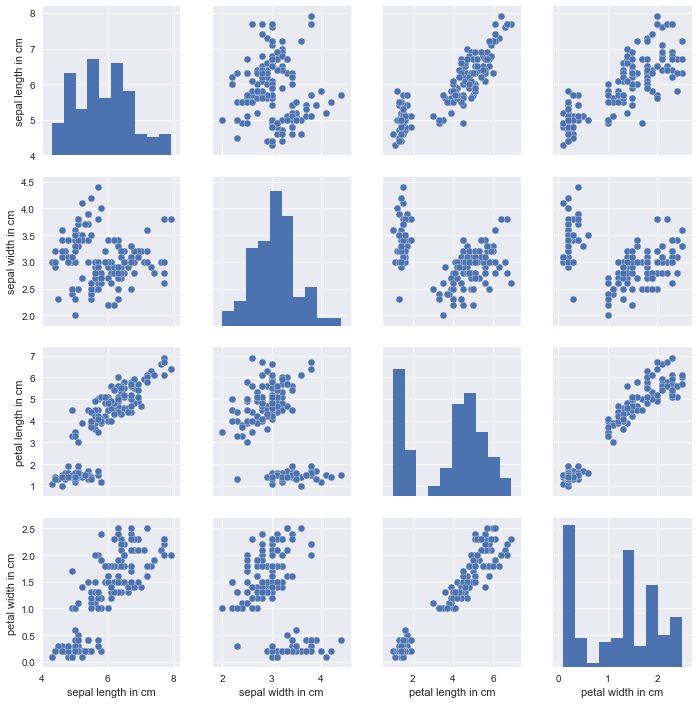

In [78]:
import seaborn as sns
sns.pairplot(ds_x)

In [91]:
ds.shape

(149, 5)

## Question 6 - Model

*Split the data in test and train sets and build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [151]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ds_x, ds_y, test_size = .30, random_state = 1)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
for i in [3,5,9]:
    classifier = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    a = accuracy_score(y_test, y_pred)
    print (a)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

0.9555555555555556


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

0.9555555555555556


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

0.9555555555555556


## Question 7 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [125]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ds_x, ds_y, test_size = .30, random_state = 0)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accu = []
for i in range(1,20,2):
    classifier = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    a = accuracy_score(y_test, y_pred)
    b= 1-a
    print (i)
    accu.append(b)

print(accu)

min(accu)
k = range(1,20,2)
print ("min k value is 7")

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

1


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

3


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

5


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

7


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

9


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

11


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')

13


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

15


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='uniform')

17


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=19, p=2,
           weights='uniform')

19
[0.0888888888888889, 0.0888888888888889, 0.06666666666666665, 0.0444444444444444, 0.0444444444444444, 0.0444444444444444, 0.0444444444444444, 0.0444444444444444, 0.0444444444444444, 0.0444444444444444]


0.0444444444444444

min k value is 7


## Question 8

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

In [126]:
k = list(range(1,20,2))
k
accu

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

[0.0888888888888889,
 0.0888888888888889,
 0.06666666666666665,
 0.0444444444444444,
 0.0444444444444444,
 0.0444444444444444,
 0.0444444444444444,
 0.0444444444444444,
 0.0444444444444444,
 0.0444444444444444]

Text(0.5,0,'Value of K')

Text(0,0.5,'value of MSE')

Text(0.5,1,'K Vs EMS')

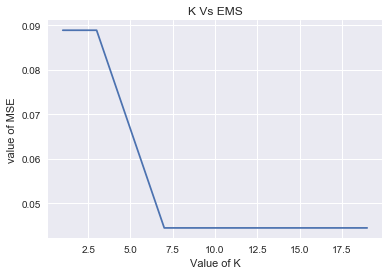

In [132]:
import matplotlib.pyplot as plt
plt.plot(k,accu)
plt.xlabel ("Value of K")
plt.ylabel("value of MSE")
plt.title("K Vs EMS")
plt.show()